In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data = data.drop(data[columns],axis=1)

In [6]:
data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [7]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

In [8]:
texts

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [9]:
texts = np.asarray(texts)

In [10]:
labels = np.asarray(labels)

In [11]:
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# number of words used as features
max_features = 10000

# cutoff the words after seeing 500 words in each document(email)
maxlen = 500

In [14]:
training_samples = int(5572*0.8)
validation_samples = int(5572 - training_samples)

In [15]:
print(len(texts) == (training_samples + validation_samples))
print('The Number of training {0}, validation {1}'.format(training_samples,validation_samples))

True
The Number of training 4457, validation 1115


In [16]:
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [17]:
sequences

[[50,
  469,
  4410,
  841,
  751,
  657,
  64,
  8,
  1324,
  89,
  121,
  349,
  1325,
  147,
  2987,
  1326,
  67,
  58,
  4411,
  144],
 [46, 336, 1495, 470, 6, 1929],
 [47,
  486,
  8,
  19,
  4,
  796,
  899,
  2,
  178,
  1930,
  1199,
  658,
  1931,
  2320,
  267,
  2321,
  71,
  1930,
  2,
  1932,
  2,
  337,
  486,
  554,
  955,
  73,
  388,
  179,
  659,
  389,
  2988],
 [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152],
 [1018, 1, 98, 107, 69, 487, 2, 956, 69, 1933, 218, 111, 471],
 [797,
  127,
  67,
  1683,
  145,
  108,
  160,
  1934,
  21,
  7,
  38,
  338,
  87,
  900,
  55,
  115,
  411,
  3,
  44,
  12,
  14,
  85,
  1935,
  46,
  380,
  955,
  4412,
  2,
  68,
  322,
  230,
  2,
  2990],
 [211, 11, 632, 9, 25, 55, 2, 381, 36, 10, 109, 718, 10, 55, 4413, 4414],
 [72,
  234,
  13,
  1200,
  2322,
  2323,
  1936,
  2324,
  2325,
  2326,
  798,
  119,
  108,
  608,
  72,
  13,
  1019,
  12,
  51,
  1684,
  842,
  412,
  2,
  1099,
  13,
  246,
  1019],
 [719,
  72,
  4

In [18]:
word_index = tokenizer.word_index
print('Found {0} unique words:'.format(len(word_index)))

Found 8920 unique words:


In [19]:
data = pad_sequences(sequences,maxlen=maxlen)

In [20]:
print('data shape:', data.shape)

data shape: (5572, 500)


In [21]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [22]:
texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

In [23]:
texts_train.shape

(4457, 500)

In [24]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history_lstm = model.fit(texts_train,y_train,epochs=10,batch_size=60,validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - acc: 0.8310 - loss: 0.4150 - val_acc: 0.9439 - val_loss: 0.1647
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - acc: 0.9684 - loss: 0.1357 - val_acc: 0.9765 - val_loss: 0.0837
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - acc: 0.9829 - loss: 0.0728 - val_acc: 0.9843 - val_loss: 0.0551
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - acc: 0.9923 - loss: 0.0381 - val_acc: 0.9821 - val_loss: 0.0575
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - acc: 0.9922 - loss: 0.0335 - val_acc: 0.9899 - val_loss: 0.0455
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - acc: 0.9930 - loss: 0.0268 - val_acc: 0.9888 - val_loss: 0.0502
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - acc: 0.9947 - loss: 0.0232 - val_acc: 0.9888 - val_loss: 0.0508
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - acc: 0.9969 - loss: 0.0194 - val_acc: 0.9899 - val_loss: 0.0559
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - acc: 0.9977

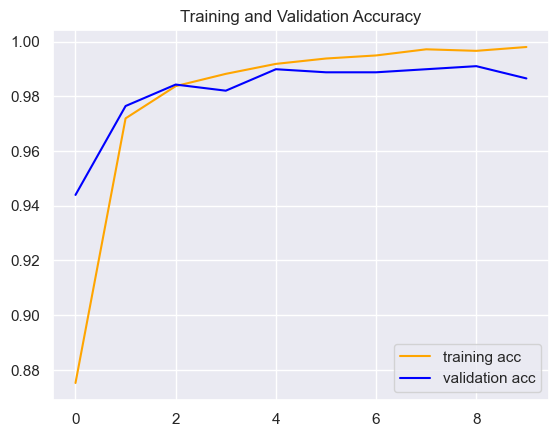

In [28]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc,'-', color='orange',label='training acc')
plt.plot(epochs,val_acc,'-',color='blue',label='validation acc')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

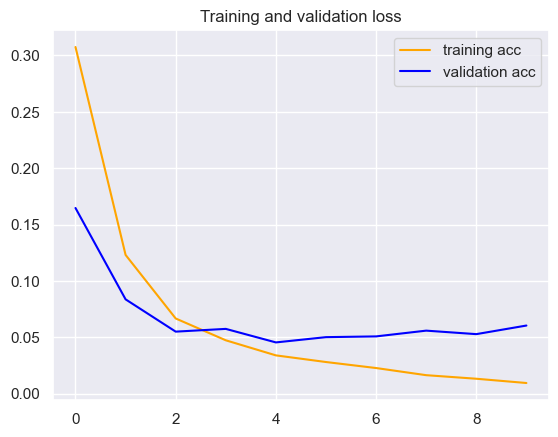

In [29]:
plt.plot(epochs, loss,'-',color='orange',label='training acc')
plt.plot(epochs, val_loss,'-',color='blue',label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
pred = model.predict(texts_test)

pred_binary = (pred>0.5).astype('int32')
acc = model.evaluate(texts_test, y_test)

print("Test loss is {0:.2f} accuracy is {1:.2f}".format(acc[0],acc[1]))
print(confusion_matrix(pred_binary,y_test))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9873 - loss: 0.0541
Test loss is 0.07 accuracy is 0.98
[[949  11]
 [  9 146]]
